In [1]:
import pandas as pd
import pyodbc as pyo

In [2]:
pyo.drivers()

['SQL Server',
 'SQL Server Native Client 11.0',
 'SQL Server Native Client RDA 11.0',
 'PostgreSQL ANSI(x64)',
 'PostgreSQL Unicode(x64)',
 'ODBC Driver 11 for SQL Server',
 'ODBC Driver 17 for SQL Server']

In [3]:
connection = pyo.connect(driver='{ODBC Driver 17 for SQL Server}',host='LAPTOP-MM3SJPRH\MSSQLSERVER02',database='booknew2',trusted_connection='yes')

In [4]:
querry = 'select * from dataset1$'

In [5]:
df = pd.read_sql(sql=querry,con=connection)

C:\Users\ACER\AppData\Local\Temp\ipykernel_12844\2264082337.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql=querry,con=connection)


In [6]:
df

,book_url,book_title,book_author,publisher,numpages,format,publicationTime,language,rating_count,review_count,category,awards,booksAuthor,followerAuthors,averageRating,im_url,book_length
0,https://www.goodreads.com/book/show/42603.Blac...,Black Like Me,John Howard Griffin,NAL Trade,208.0,Paperback,1.052204e+12,English,67647.0,3210.0,Nonfiction,1,34.0,446.0,4.10,https://images-na.ssl-images-amazon.com/images...,Medium
1,https://www.goodreads.com/book/show/6186357-th...,The Maze Runner,James Dashner,Delacorte Press,384.0,Hardcover,1.254812e+12,English,1459240.0,63915.0,Young Adult,1,113.0,33473.0,4.05,https://images-na.ssl-images-amazon.com/images...,Medium
2,https://www.goodreads.com/book/show/542414.Sco...,Scorpia,Anthony Horowitz,Puffin Books,388.0,Paperback,1.140077e+12,English,58098.0,1561.0,Young Adult,0,433.0,16627.0,4.18,https://images-na.ssl-images-amazon.com/images...,Medium
3,https://www.goodreads.com/book/show/20367560-t...,Terry Treetop and the Lost Egg,Tali Carmi,CreateSpace Independent Publishing Platform,38.0,Paperback,1.387786e+12,English,3902.0,157.0,Childrens,0,45.0,135.0,3.84,https://images-na.ssl-images-amazon.com/images...,Short
4,https://www.goodreads.com/book/show/39880700-d...,Digging a Hole,Mimi Jean Pamfiloff,Mimi Boutique,300.0,ebook,1.529392e+12,English,2036.0,217.0,Romance,0,72.0,4238.0,3.94,https://images-na.ssl-images-amazon.com/images...,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,https://www.goodreads.com/book/show/13835.In_t...,In the Hand of the Goddess,Tamora Pierce,Simon Pulse,264.0,Mass Market Paperback,1.104566e+12,English,96776.0,2404.0,Fantasy,1,125.0,83645.0,4.23,https://images-na.ssl-images-amazon.com/images...,Medium
8732,https://www.goodreads.com/book/show/25667026-s...,Stone Field,Christy Lenzi,Roaring Brook Press,320.0,Hardcover,1.459235e+12,English,313.0,93.0,Historical Fiction,0,2.0,76.0,3.21,https://images-na.ssl-images-amazon.com/images...,Medium
8733,https://www.goodreads.com/book/show/311196.Fre...,Frederica,Georgette Heyer,Arrow,380.0,Paperback,7.148988e+11,English,21913.0,2101.0,Romance,0,229.0,4798.0,4.19,https://images-na.ssl-images-amazon.com/images...,Medium
8734,https://www.goodreads.com/book/show/25718904-m...,Mojado,R. Allen Chappell,R. Allen Chappell LLC,198.0,Kindle Edition,1.434006e+12,English,1744.0,88.0,Mystery,0,17.0,110.0,4.34,https://images-na.ssl-images-amazon.com/images...,Short


In [7]:
import os
import re
import nltk
import requests
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
nltk.download("stopwords")

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

warnings.filterwarnings('ignore')
from PIL import Image

warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df.head

<bound method NDFrame.head of                                                book_url  \
0     https://www.goodreads.com/book/show/42603.Blac...   
1     https://www.goodreads.com/book/show/6186357-th...   
2     https://www.goodreads.com/book/show/542414.Sco...   
3     https://www.goodreads.com/book/show/20367560-t...   
4     https://www.goodreads.com/book/show/39880700-d...   
...                                                 ...   
8731  https://www.goodreads.com/book/show/13835.In_t...   
8732  https://www.goodreads.com/book/show/25667026-s...   
8733  https://www.goodreads.com/book/show/311196.Fre...   
8734  https://www.goodreads.com/book/show/25718904-m...   
8735  https://www.goodreads.com/book/show/5199022-cu...   

                          book_title          book_author  \
0                      Black Like Me  John Howard Griffin   
1                    The Maze Runner        James Dashner   
2                            Scorpia     Anthony Horowitz   
3     Terry Treet

In [9]:
df.shape

(8736, 17)

In [10]:
df.reset_index(drop=True, inplace=True)
df.head

<bound method NDFrame.head of                                                book_url  \
0     https://www.goodreads.com/book/show/42603.Blac...   
1     https://www.goodreads.com/book/show/6186357-th...   
2     https://www.goodreads.com/book/show/542414.Sco...   
3     https://www.goodreads.com/book/show/20367560-t...   
4     https://www.goodreads.com/book/show/39880700-d...   
...                                                 ...   
8731  https://www.goodreads.com/book/show/13835.In_t...   
8732  https://www.goodreads.com/book/show/25667026-s...   
8733  https://www.goodreads.com/book/show/311196.Fre...   
8734  https://www.goodreads.com/book/show/25718904-m...   
8735  https://www.goodreads.com/book/show/5199022-cu...   

                          book_title          book_author  \
0                      Black Like Me  John Howard Griffin   
1                    The Maze Runner        James Dashner   
2                            Scorpia     Anthony Horowitz   
3     Terry Treet

In [11]:
df.head()

,book_url,book_title,book_author,publisher,numpages,format,publicationTime,language,rating_count,review_count,category,awards,booksAuthor,followerAuthors,averageRating,im_url,book_length
0,https://www.goodreads.com/book/show/42603.Blac...,Black Like Me,John Howard Griffin,NAL Trade,208.0,Paperback,1.052204e+12,English,67647.0,3210.0,Nonfiction,1,34.0,446.0,4.10,https://images-na.ssl-images-amazon.com/images...,Medium
1,https://www.goodreads.com/book/show/6186357-th...,The Maze Runner,James Dashner,Delacorte Press,384.0,Hardcover,1.254812e+12,English,1459240.0,63915.0,Young Adult,1,113.0,33473.0,4.05,https://images-na.ssl-images-amazon.com/images...,Medium
2,https://www.goodreads.com/book/show/542414.Sco...,Scorpia,Anthony Horowitz,Puffin Books,388.0,Paperback,1.140077e+12,English,58098.0,1561.0,Young Adult,0,433.0,16627.0,4.18,https://images-na.ssl-images-amazon.com/images...,Medium
3,https://www.goodreads.com/book/show/20367560-t...,Terry Treetop and the Lost Egg,Tali Carmi,CreateSpace Independent Publishing Platform,38.0,Paperback,1.387786e+12,English,3902.0,157.0,Childrens,0,45.0,135.0,3.84,https://images-na.ssl-images-amazon.com/images...,Short
4,https://www.goodreads.com/book/show/39880700-d...,Digging a Hole,Mimi Jean Pamfiloff,Mimi Boutique,300.0,ebook,1.529392e+12,English,2036.0,217.0,Romance,0,72.0,4238.0,3.94,https://images-na.ssl-images-amazon.com/images...,Medium


In [37]:
def content_based_recommender(book_title):
    if book_title in df['book_title'].values:
        rating_counts = df['rating_count'][df['rating_count'] <= 100].index
        rare_books = rating_counts <= 100
        common_books = df[~df['book_title'].isin(rare_books)]
        
        if book_title in rare_books:
            
            random = pd.Series(common_books['book_title'].unique()).sample(2).values
            print('There are no recommendations for this book')
            print('Try: \n')
            print('{}'.format(random[0]),'\n')
            print('{}'.format(random[1]),'\n')
        
        else:
            
            common_books = common_books.drop_duplicates(subset=['book_title'])
            common_books.reset_index(inplace= True)
            common_books['index'] = [i for i in range(common_books.shape[0])]
            target_cols = ['book_title','book_author','publisher','category','book_length']
            common_books['combined_features'] = [' '.join(common_books[target_cols].iloc[i,].values) for i in range(common_books[target_cols].shape[0])]
            cv = CountVectorizer()
            count_matrix = cv.fit_transform(common_books['combined_features'])
            cosine_sim = cosine_similarity(count_matrix)
            index = common_books[common_books['book_title'] == book_title]['index'].values[0]
            sim_books = list(enumerate(cosine_sim[index]))
            sorted_sim_books = sorted(sim_books,key=lambda x:x[1],
                                      reverse=True)[1:6]
            
            books = []
            for i in range(len(sorted_sim_books)):
                book_index = sorted_sim_books[i][0]
                books.append(common_books[common_books['index'] == book_index]['book_title'].item())
                if common_books.loc[book_index, 'awards'] == 1:
                    books.append(book_title)
            fig, axs = plt.subplots(1, 5,figsize=(18,5))
            fig.suptitle('You may also like these books', size = 22)
            
            for i in range(len(books)):
        
                url = common_books.loc[common_books['book_title'] == books[i],'im_url'][:1].values[0]
                im = Image.open(requests.get(url, stream=True).raw)
                axs[i].imshow(im)
                axs[i].axis("off")
                axs[i].set_title('Rating: {}'.format(round(df[df['book_title'] == books[i]]['averageRating'].mean(),1)),
                             y=-0.18,
                                 color="red",
                                 fontsize=18)
                fig.show()
                     
    else:
        
        print('Cant find book in dataset, please check spelling')

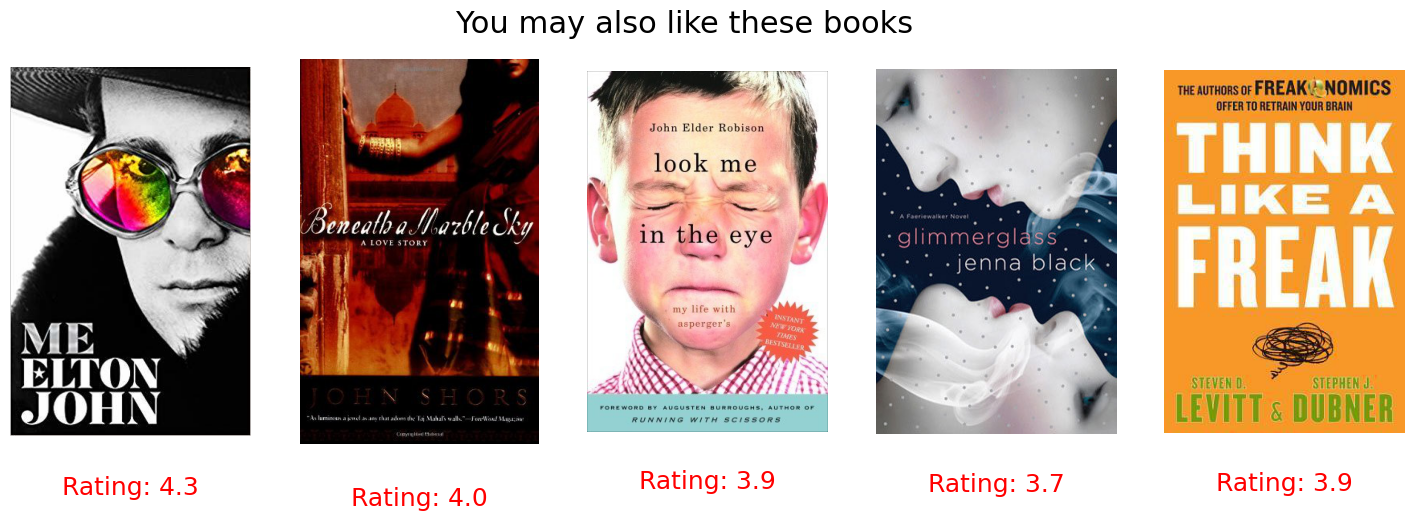

In [39]:
content_based_recommender('Black Like Me')

In [14]:
import pickle
pickle.dump(df,open('data.pkl','wb'))

In [15]:
df['im_url'][0]

'https://images-na.ssl-images-amazon.com/images/S/compressed.photo.goodreads.com/books/1311696842i/42603.jpg'

In [42]:
import pickle
pickle.dump(df_new,open('data1.pkl','wb'))

In [33]:
def recommend(user_input):
    if user_input in df['book_title'].values:
        rating_counts = df['rating_count'][df['rating_count'] <= 100].index
        rare_books = rating_counts <= 100
        common_books = df[~df['book_title'].isin(rare_books)]

        if user_input in rare_books:

            random = pd.Series(common_books['book_title'].unique()).sample(2).values
            print('There are no recommendations for this book')
            print('Try: \n')
            print('{}'.format(random[0]), '\n')
            print('{}'.format(random[1]), '\n')

        else:

            common_books = common_books.drop_duplicates(subset=['book_title'])
            common_books.reset_index(inplace=True)
            common_books['index'] = [i for i in range(common_books.shape[0])]
            target_cols = ['book_title', 'book_author', 'publisher', 'category', 'book_length']
            common_books['combined_features'] = [' '.join(common_books[target_cols].iloc[i,].values) for i in
                                                 range(common_books[target_cols].shape[0])]
            cv = CountVectorizer()
            count_matrix = cv.fit_transform(common_books['combined_features'])
            cosine_sim = cosine_similarity(count_matrix)
            index = common_books[common_books['book_title'] == user_input]['index'].values[0]
            sim_books = list(enumerate(cosine_sim[index]))
            sorted_sim_books = sorted(sim_books, key=lambda x: x[1],
                                      reverse=True)[1:6]

            books = []
            for i in sorted_sim_books:
                item = []
                temp_df = common_books[common_books['index'] == i[0]]
                item.extend(list(temp_df.drop_duplicates('book_title')['book_title'].values))
                item.extend(list(temp_df.drop_duplicates('book_title')['book_author'].values))
                item.extend(list(temp_df.drop_duplicates('book_title')['im_url'].values))

                books.append(item)

            print(books)
    else:
        
        print('Cant find book in dataset, please check spelling')
                

In [34]:
recommend('Pride and Prejudice')

[['Pride and Prejudice and Zombies', 'Seth Grahame-Smith', 'https://images-na.ssl-images-amazon.com/images/S/compressed.photo.goodreads.com/books/1320449653i/5899779.jpg'], ['Northanger Abbey', 'Jane Austen', 'https://images-na.ssl-images-amazon.com/images/S/compressed.photo.goodreads.com/books/1388201718i/50398.jpg'], ['Persuasion', 'Jane Austen', 'https://images-na.ssl-images-amazon.com/images/S/compressed.photo.goodreads.com/books/1385172413i/2156.jpg'], ['Sense and Sensibility', 'Jane Austen', 'https://images-na.ssl-images-amazon.com/images/S/compressed.photo.goodreads.com/books/1397245675i/14935.jpg'], ['Emma', 'Jane Austen', 'https://images-na.ssl-images-amazon.com/images/S/compressed.photo.goodreads.com/books/1373627931i/6969.jpg']]


In [40]:
df_new=df.head(100)

In [41]:
df_new

,book_url,book_title,book_author,publisher,numpages,format,publicationTime,language,rating_count,review_count,category,awards,booksAuthor,followerAuthors,averageRating,im_url,book_length
0,https://www.goodreads.com/book/show/42603.Blac...,Black Like Me,John Howard Griffin,NAL Trade,208.0,Paperback,1.052204e+12,English,67647.0,3210.0,Nonfiction,1,34.0,446.0,4.10,https://images-na.ssl-images-amazon.com/images...,Medium
1,https://www.goodreads.com/book/show/6186357-th...,The Maze Runner,James Dashner,Delacorte Press,384.0,Hardcover,1.254812e+12,English,1459240.0,63915.0,Young Adult,1,113.0,33473.0,4.05,https://images-na.ssl-images-amazon.com/images...,Medium
2,https://www.goodreads.com/book/show/542414.Sco...,Scorpia,Anthony Horowitz,Puffin Books,388.0,Paperback,1.140077e+12,English,58098.0,1561.0,Young Adult,0,433.0,16627.0,4.18,https://images-na.ssl-images-amazon.com/images...,Medium
3,https://www.goodreads.com/book/show/20367560-t...,Terry Treetop and the Lost Egg,Tali Carmi,CreateSpace Independent Publishing Platform,38.0,Paperback,1.387786e+12,English,3902.0,157.0,Childrens,0,45.0,135.0,3.84,https://images-na.ssl-images-amazon.com/images...,Short
4,https://www.goodreads.com/book/show/39880700-d...,Digging a Hole,Mimi Jean Pamfiloff,Mimi Boutique,300.0,ebook,1.529392e+12,English,2036.0,217.0,Romance,0,72.0,4238.0,3.94,https://images-na.ssl-images-amazon.com/images...,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,https://www.goodreads.com/book/show/1472878.Fi...,Firefly Lane,Kristin Hannah,St. Martin's Press,479.0,Hardcover,1.202198e+12,English,372702.0,28574.0,Fiction,1,128.0,206281.0,4.16,https://images-na.ssl-images-amazon.com/images...,Long
96,https://www.goodreads.com/book/show/16220184-c...,Crossroads and the Himalayan Crystals,C. Toni Graham,BalboaPress,266.0,Paperback,1.348124e+12,English,11865.0,52.0,Fantasy,0,3.0,1531.0,4.33,https://images-na.ssl-images-amazon.com/images...,Medium
97,https://www.goodreads.com/book/show/18334354-q...,Quantum Roots,Kyle Keyes,CreateSpace,262.0,Paperback,1.343804e+12,English,3332.0,31.0,Fiction,0,15.0,3417.0,4.28,https://images-na.ssl-images-amazon.com/images...,Medium
98,https://www.goodreads.com/book/show/5203.She_s...,She's Come Undone,Wally Lamb,Pocket,465.0,Mass Market Paperback,8.990172e+11,English,342687.0,11062.0,Fiction,1,16.0,7453.0,3.90,https://images-na.ssl-images-amazon.com/images...,Long
